In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf

from sklearn.neighbors import NearestNeighbors

Weźmy 1000 elementów z rozkładu N(0,1) i m elementów z rozkładu N(0,25) (25 to wariancja, odchylenie 5). Znajdźmy podział optymalny w sensie naszego wskaźnika dla m po kolei 0, 10, 20, 50, 100, 200, 500, 1000.

Siatka dla k: (1, 2, 5, 10, 20, 50, 100, 200, 500)

Ustalone r=0.05

\newpage

m_noise=0
Wynik podstawowy przy r=0.05, k=10


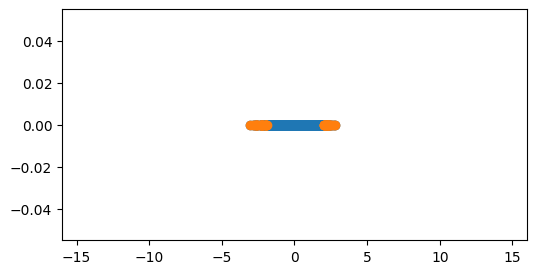

Wskaźnik jakości: 0.450771
Liczba nietypowych elementów: 50/1000 (5.000%)

Wynik po optymalizacji


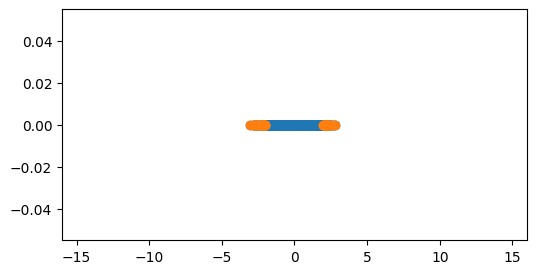

Najlepsze k: 50
Wskaźnik jakości: 0.439886
Liczba nietypowych elementów: 50/1000 (5.000%)

------------------------------
m_noise=10
Wynik podstawowy przy r=0.05, k=10


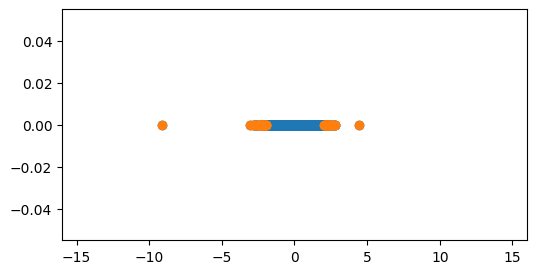

Wskaźnik jakości: 0.423897
Liczba nietypowych elementów: 51/1010 (5.050%)

Wynik po optymalizacji


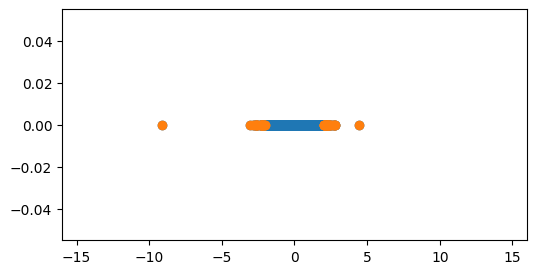

Najlepsze k: 50
Wskaźnik jakości: 0.415083
Liczba nietypowych elementów: 51/1010 (5.050%)

------------------------------
m_noise=20
Wynik podstawowy przy r=0.05, k=10


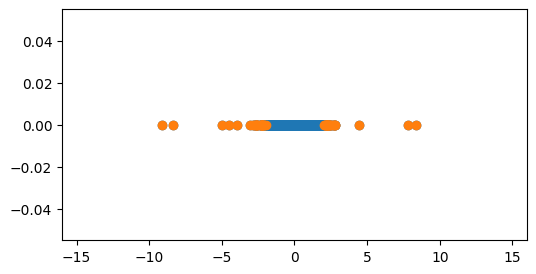

Wskaźnik jakości: 0.365122
Liczba nietypowych elementów: 51/1020 (5.000%)

Wynik po optymalizacji


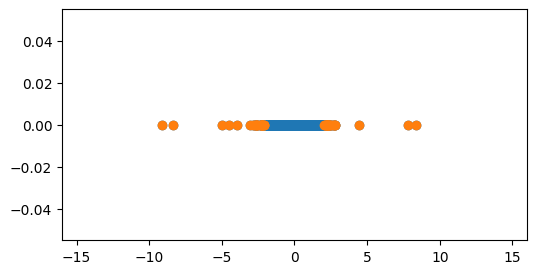

Najlepsze k: 50
Wskaźnik jakości: 0.355524
Liczba nietypowych elementów: 51/1020 (5.000%)

------------------------------
m_noise=50
Wynik podstawowy przy r=0.05, k=10


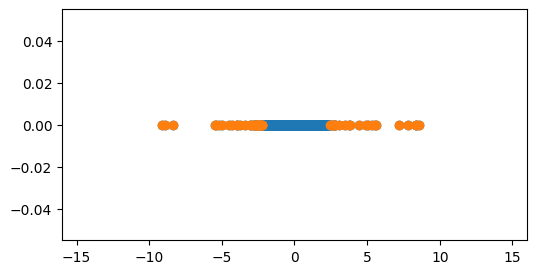

Wskaźnik jakości: 0.221356
Liczba nietypowych elementów: 53/1050 (5.048%)

Wynik po optymalizacji


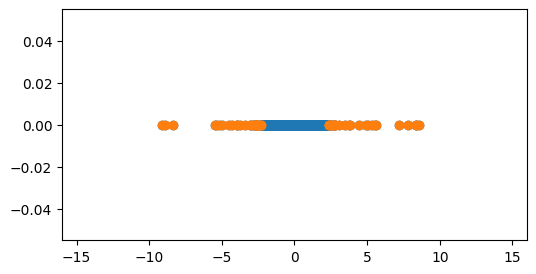

Najlepsze k: 50
Wskaźnik jakości: 0.218270
Liczba nietypowych elementów: 53/1050 (5.048%)

------------------------------
m_noise=100
Wynik podstawowy przy r=0.05, k=10


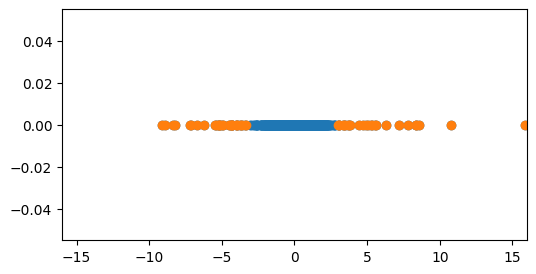

Wskaźnik jakości: 0.163813
Liczba nietypowych elementów: 55/1100 (5.000%)

Wynik po optymalizacji


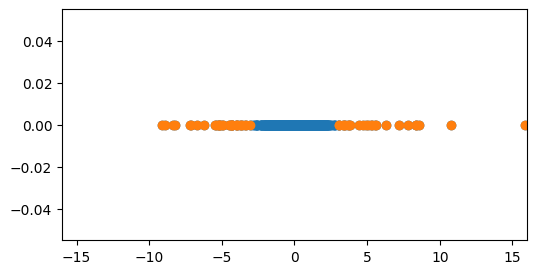

Najlepsze k: 20
Wskaźnik jakości: 0.163185
Liczba nietypowych elementów: 55/1100 (5.000%)

------------------------------
m_noise=200
Wynik podstawowy przy r=0.05, k=10


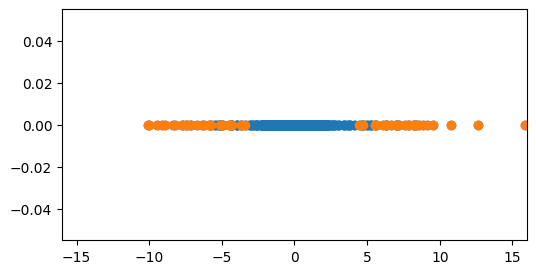

Wskaźnik jakości: 0.434835
Liczba nietypowych elementów: 60/1200 (5.000%)

Wynik po optymalizacji


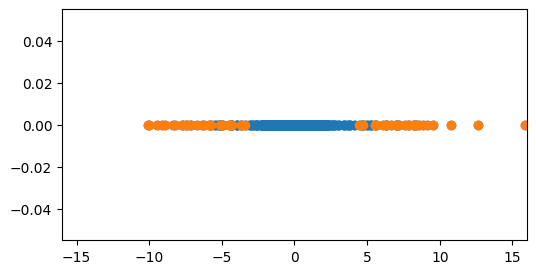

Najlepsze k: 10
Wskaźnik jakości: 0.434835
Liczba nietypowych elementów: 60/1200 (5.000%)

------------------------------
m_noise=500
Wynik podstawowy przy r=0.05, k=10


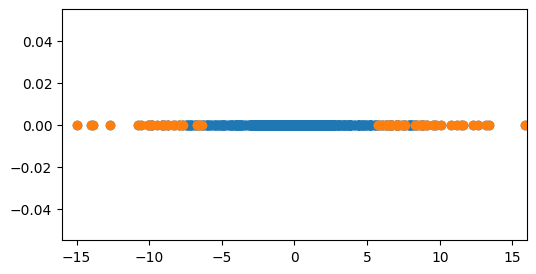

Wskaźnik jakości: 0.446181
Liczba nietypowych elementów: 75/1500 (5.000%)

Wynik po optymalizacji


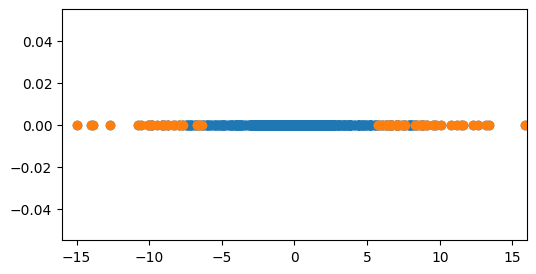

Najlepsze k: 10
Wskaźnik jakości: 0.446181
Liczba nietypowych elementów: 75/1500 (5.000%)

------------------------------
m_noise=1000
Wynik podstawowy przy r=0.05, k=10


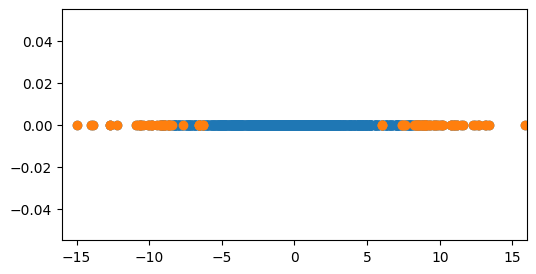

Wskaźnik jakości: 0.530493
Liczba nietypowych elementów: 100/2000 (5.000%)

Wynik po optymalizacji


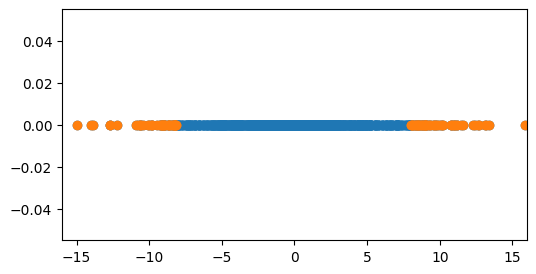

Najlepsze k: 50
Wskaźnik jakości: 0.507524
Liczba nietypowych elementów: 100/2000 (5.000%)

------------------------------


In [3]:
n = 1
m_train1 = 1000
    
k_grid = (1, 2, 5, 10, 20, 50, 100, 200, 500)

for m_noise in [0, 10, 20, 50, 100, 200, 500, 1000]:
    np.random.seed(0)
    print(f"{m_noise=:}")
    print("Wynik podstawowy przy r=0.05, k=10")
    
    # Data
    x_train1 = np.random.normal(0, 1, size=(m_train1, n))
    x_train2 = np.random.normal(0, 5, size=(m_noise, n))
    x_train = np.concatenate((x_train1, x_train2))
    m_train = x_train.shape[0]
    
    bandwidth = direct_plugin(x_train)

    # Outliers detection
    k = 10 + 1  # int(np.sqrt(m_train))
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    r = 0.05
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)
    metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 0]*0)
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0]*0)
    plt.xlim(-16, 16)
    plt.show()
    
    print(f"Wskaźnik jakości: {metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    # Dopasowanie parametrów na siatce
    print("Wynik po optymalizacji")
    
    best_metric = np.inf
    for k in k_grid:
        nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='brute').fit(x_train)
        distances, indices = nbrs.kneighbors(x_train)
        dist_k = np.max(distances, axis=1)
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)
        metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
        if metric < best_metric:
            best_k = k + 1
            best_metric = metric

    # Outliers detection
    nbrs = NearestNeighbors(n_neighbors=best_k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 0]*0)
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 0]*0)
    plt.xlim(-16, 16)
    plt.show()

    print(f"Najlepsze k: {best_k - 1}")
    print(f"Wskaźnik jakości: {best_metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    print("-" * 30)